### Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

### Решением будет ссылка на гитхаб с ноутбуком.

In [6]:
import pandas as pd

In [7]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
car_sales_in_quebec = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")


# Отображение графика

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly car sales in Quebec": car_sales_in_quebec["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
}

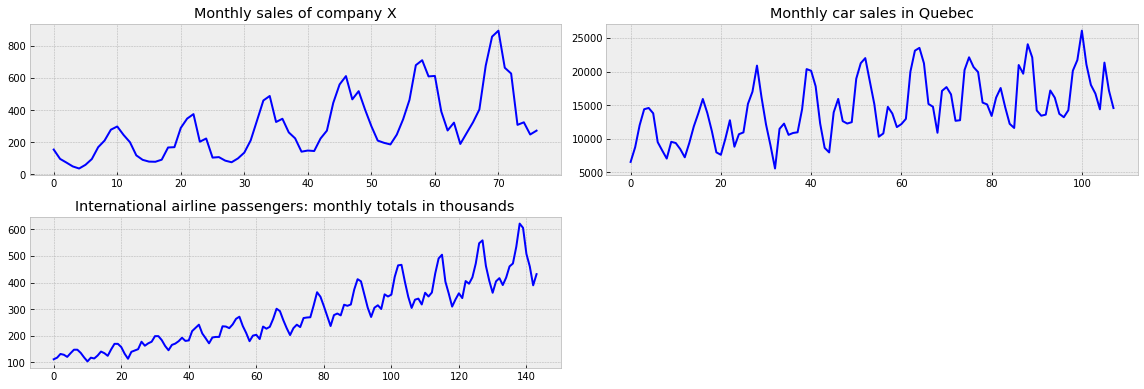

In [10]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

#### На всех трех графиках виден восходящий тренд и сезонность

# Нормализуем дисперсию

In [11]:
from scipy.stats import boxcox

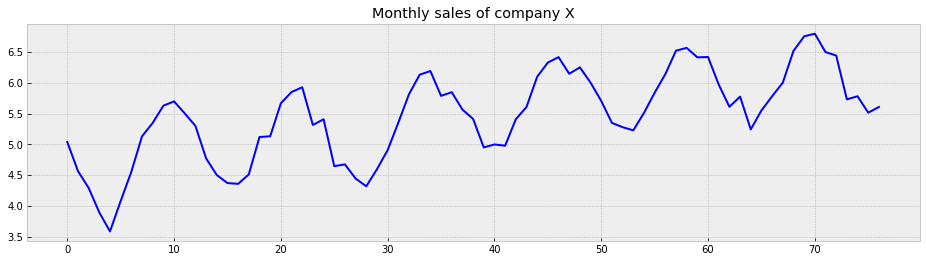

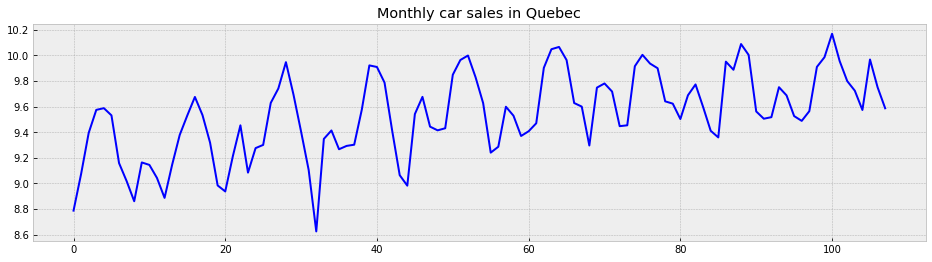

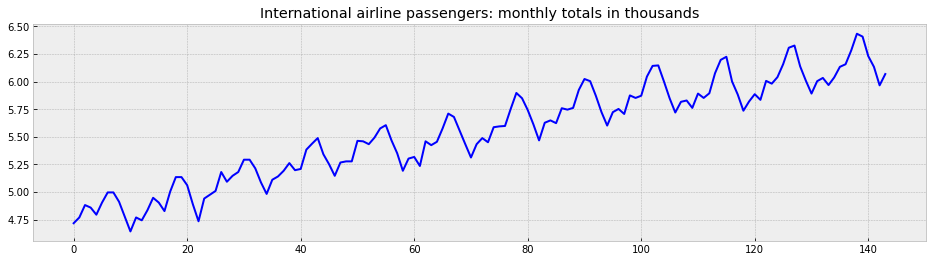

In [12]:
boxcox_dict = {}
for key in all_series.keys():
    boxcox_dict[key] = boxcox(all_series[key], 0)
    with plt.style.context('bmh'):
            plt.figure(figsize=(16, 4))
            plt.plot(boxcox_dict[key], color='blue')
            plt.title(key)

# Дифференцируем 

In [13]:
import numpy as np

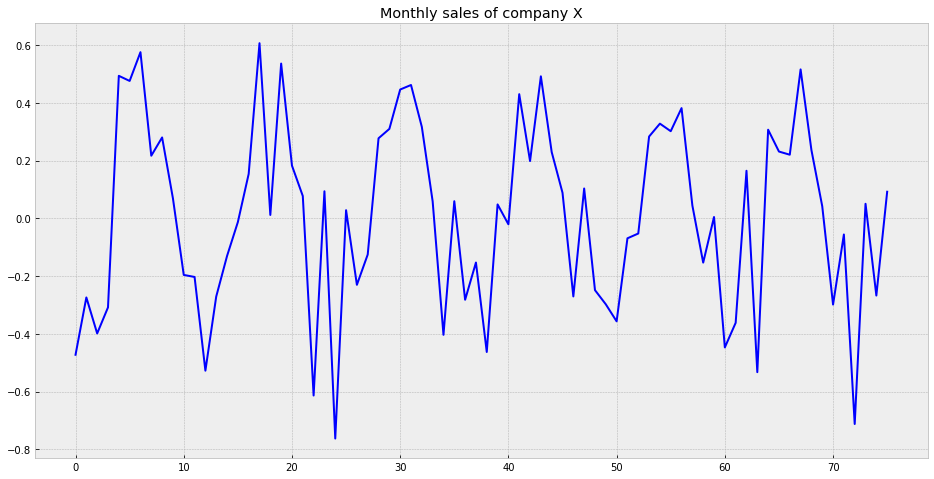

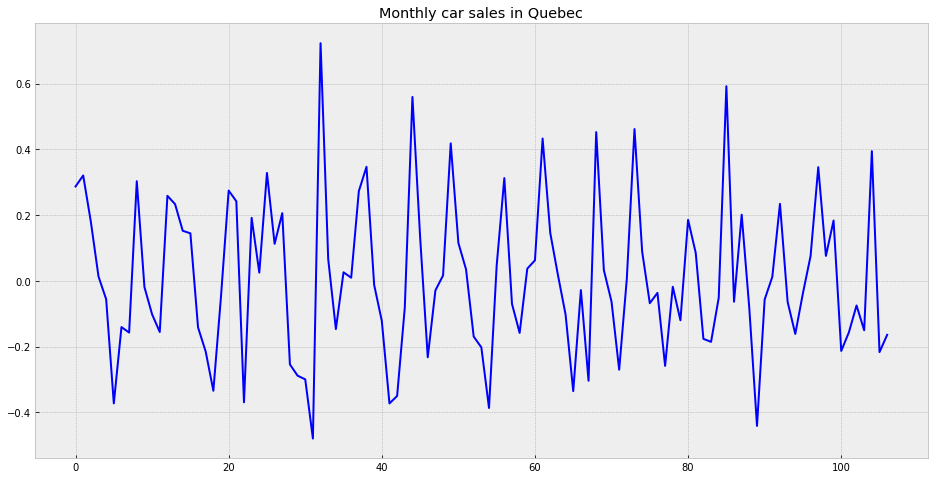

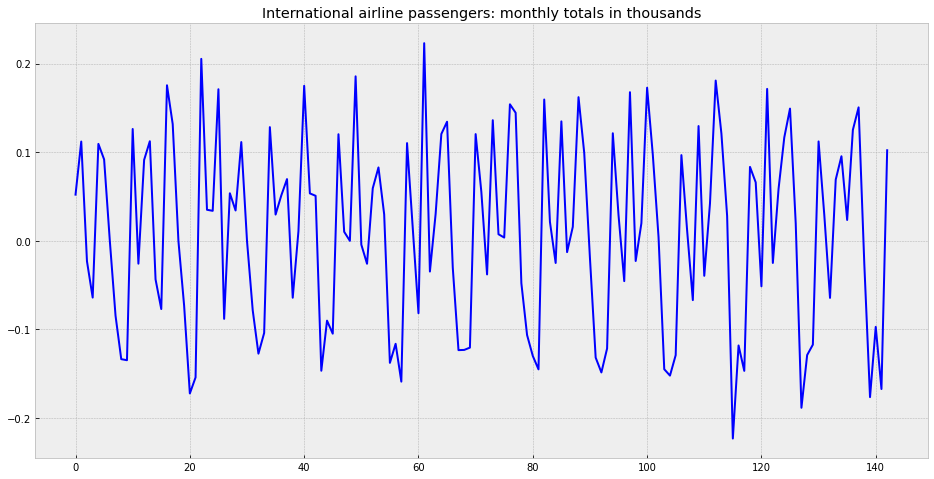

In [15]:
diff_dict = {}
for key in boxcox_dict:
    diff_dict[key] = np.diff(boxcox_dict[key], 1)
    with plt.style.context('bmh'):
            plt.figure(figsize=(16, 8))
            plt.plot(diff_dict[key], color='blue')
            plt.title(key)

### Убрали сезонность и сделали ряды стационарными

# Тест Дики-Фуллера 

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [18]:
# Реультаты теста на стационарном ряде
for key in diff_dict:
    print('\n', key, '\n---------------------',)
    test_stationarity(diff_dict[key])


 Monthly sales of company X 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

 Monthly car sales in Quebec 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64

 International airline passengers: monthly totals in thousands 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                 

### Test Statistic на всех рядах левее, чем критические значения, что может говорить о том, что ряды стационарные

In [19]:
# Реультаты теста на нестационарном ряде
for key in all_series:
    print('\n', key, '\n---------------------',)
    test_stationarity(all_series[key])


 Monthly sales of company X 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

 Monthly car sales in Quebec 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64

 International airline passengers: monthly totals in thousands 
---------------------
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                 

### Test Statistic на всех рядах правее, чем критические значения, что может говорить о том, что ряды НЕстационарные

# Коррелограммы

In [20]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [21]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

c:\users\рус\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\рус\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\рус\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


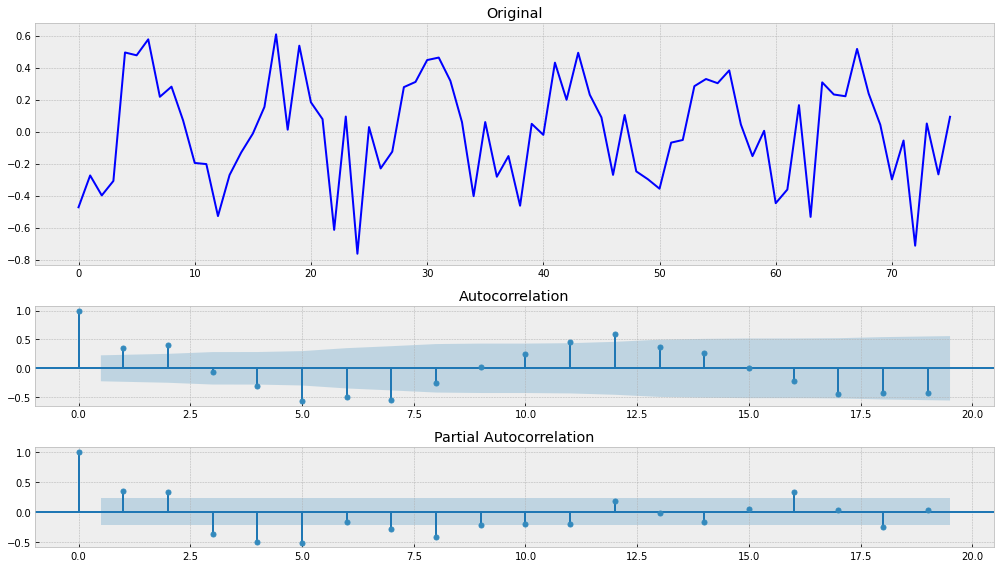

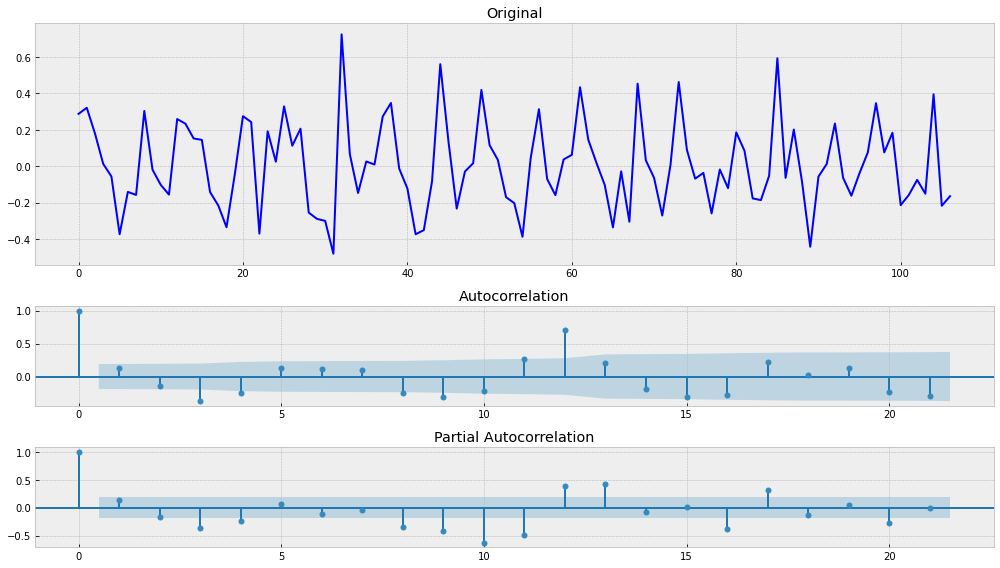

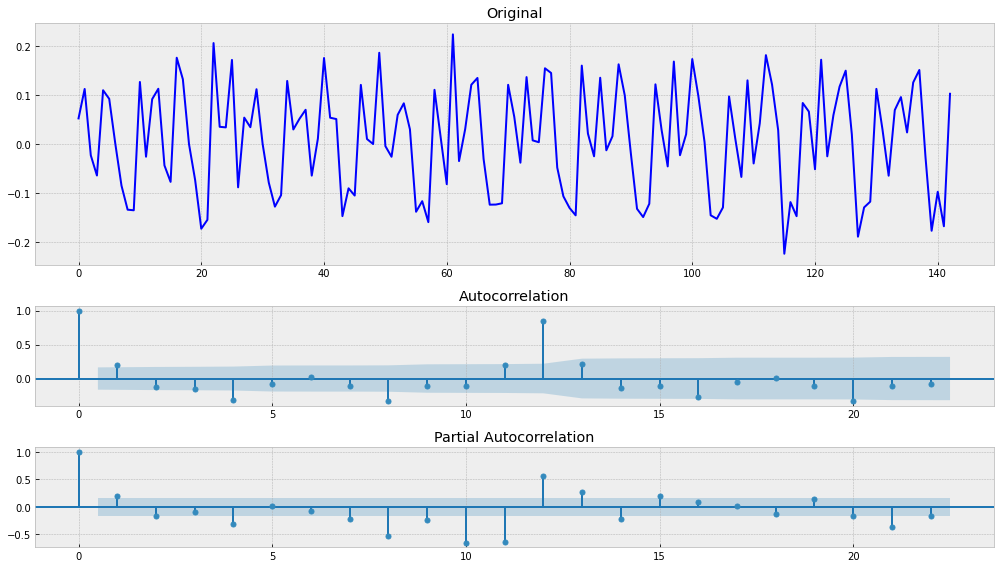

In [22]:
for key in diff_dict:
    tsplot(diff_dict[key])

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


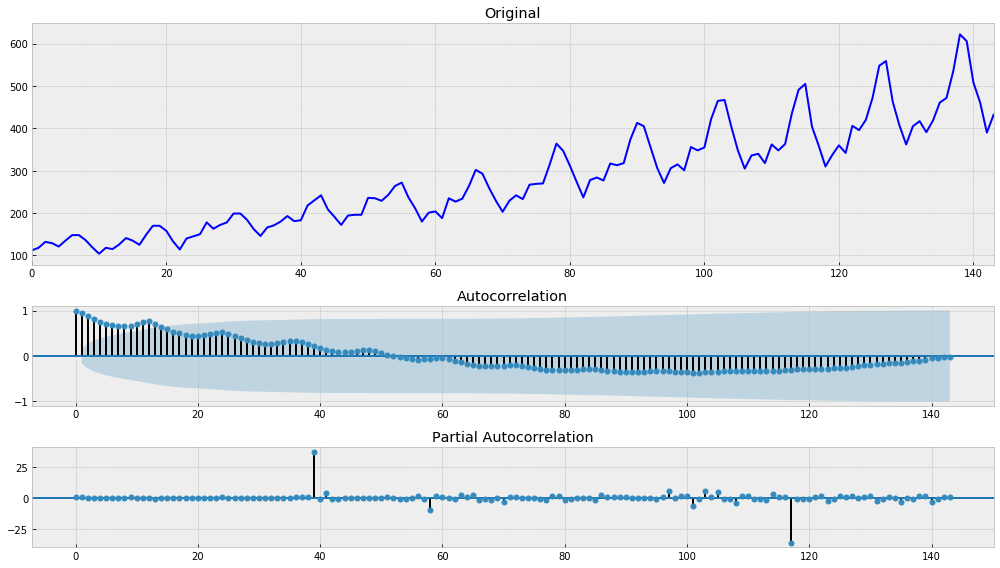

In [21]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])